https://docs.microsoft.com/en-us/learn/modules/intro-machine-learning-pytorch/3-data

# Show Variables

## Method 1:
想請問google colab可以像spyder一樣把所有的變數顯示出來嗎？\
其實只要是 IPython 都可以喔\
%%whos\
Spyder 只是多了一個視窗隨時看而已

In [ ]:
%whos

Interactive namespace is empty.


## Method 2:

In [ ]:
from google.colab import output
#I don't know why nbextensions don't work with python3.6 
with output.temporary():
  !pip install --upgrade git+https://github.com/Kreijstal/colab_inspector.git 
  !python2.7 -m pip install --upgrade git+https://github.com/blois/colab_inspector.git #yes, really.
  !jupyter nbextension install --py inspector

import inspector

# open a scratch cell (Ctrl+Alt+N)
# run there
# inspector.watch_globals()

# Tutorial

In [ ]:
%matplotlib inline

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    target_transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


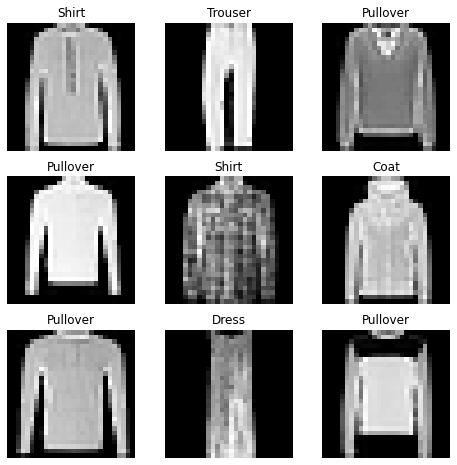

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(high=len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]  # img.shape = [1, 28, 28]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  # squeeze(): Returns a tensor with all the dimensions of input of size 1 removed.
plt.show()

In [ ]:
import os
import pandas as pd
import torchvision.io as tvio

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)  # labels are stored separately in a CSV file annotations_file (file_name, label)
        self.img_dir = img_dir  #  the FashionMNIST images are stored in a directory img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem___(self, idx):
        img_path = os.paht.join(self.img_dir, self.img_labels.iloc[idx, 0])  # DataFrame.iloc[]: Purely integer-location based indexing for selection by position
        # os.path.join() return a string
        image = tvio.read_image(img_path)  # converts JPEG/PNG to a tensor using read_image. Return: Tensor[channel, height, width]
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Lables batch shape: torch.Size([64])


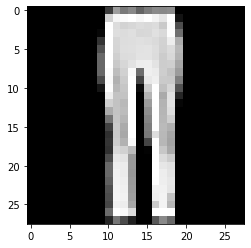

Label: 1


In [ ]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Lables batch shape: {train_labels.size()}")
img = train_features[0].squeeze()  # img.shape: [28, 28]
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")